In [3]:
# import das bibliotecas

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
from scipy import signal
rcParams['figure.figsize'] = [16., 5.]

In [4]:
# definições de filtros

def butter_bandpass(data, lowcut, highcut, fs=200, order=4):
    nyq = fs * 0.5
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='bandpass')
    return signal.filtfilt(b, a, data)

def butter_lowpass(data, lowcut, fs=200, order=4):
    nyq = fs * 0.5
    low = lowcut / nyq
    b, a = signal.butter(order, low, btype='lowpass')
    return signal.filtfilt(b, a, data)

def butter_highpass(data, highcut, fs=200, order=4):
    nyq = fs * 0.5
    high = highcut / nyq
    b, a = signal.butter(order, high, btype='highpass')
    return signal.filtfilt(b, a, data)

def butter_notch(data, cutoff, var=1, fs=200, order=4):
    nyq = fs * 0.5
    low = (cutoff - var) / nyq
    high = (cutoff + var) / nyq
    b, a = signal.iirfilter(order, [low, high], btype='bandstop', ftype="butter")
    return signal.filtfilt(b, a, data)

In [5]:
from glob import glob

In [6]:
dirs = [ i.split("/")[-1] for i in glob('datasets/topicos_cc/p1*')]
dirs

['p1_2_29-03-2022_14:54:03.npy',
 'p1_3_29-03-2022_14:57:12.npy',
 'p1_1_29-03-2022_14:51:01.npy']

(8, 4, 1600)


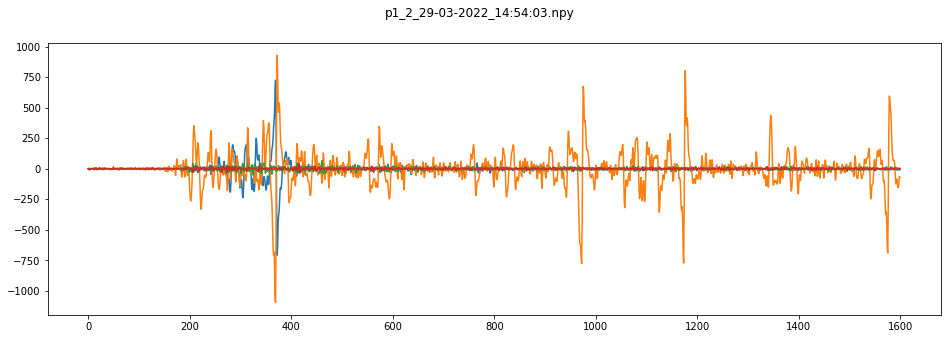

(8, 4, 1600)


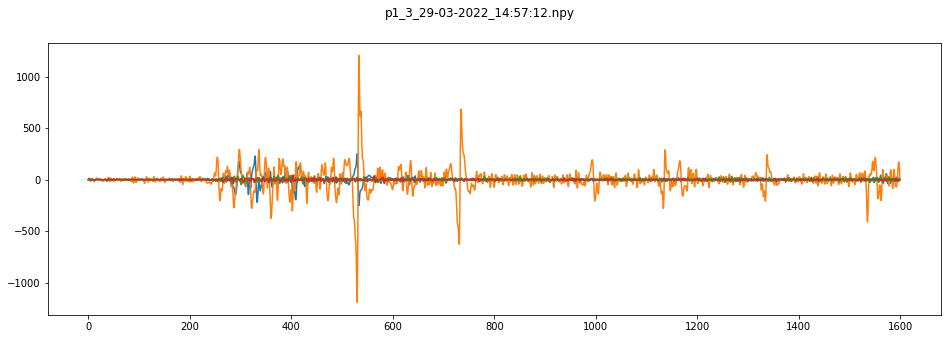

(8, 4, 1600)


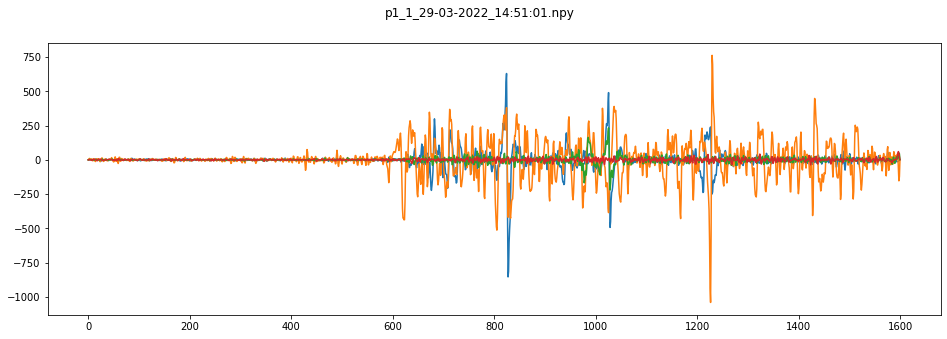

In [7]:
def loadSujeito(dirs):
    data = np.load("datasets/topicos_cc/"+dirs)
    data = np.transpose(data, (0, 2, 1))
    print(data.shape)
    data_filtered = butter_notch(data, 60)
    data_filtered = butter_highpass(data_filtered, 5)
    data_filtered = butter_lowpass(data_filtered, 50)
    for i in range(data_filtered.shape[1]):
        plt.plot(data_filtered[0,i,:])
    plt.suptitle(dirs)
    plt.show()
    
    
for d in dirs:
    loadSujeito(d)

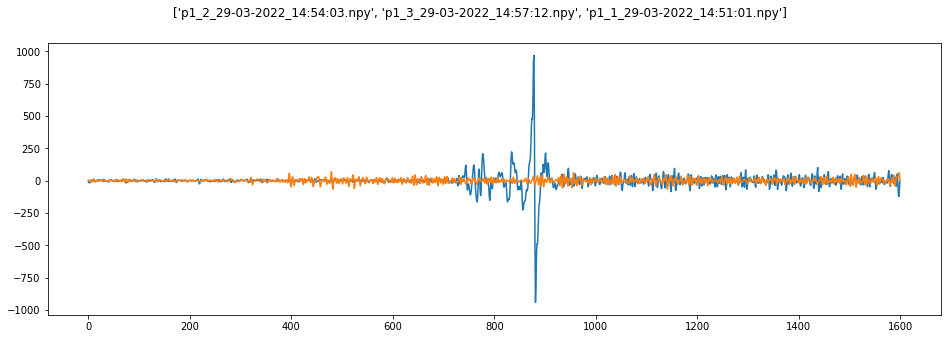

In [8]:
# Distinção: Mesmo cara

# Coerencia: Mesmo cara, != trial, Mesmo Movimento
#Coenrencia do mesmo movimento para diferente trials

data = np.load("datasets/topicos_cc/p1_1_29-03-2022_14:51:01.npy")
data2 = np.load("datasets/topicos_cc/p1_2_29-03-2022_14:54:03.npy")

data = np.transpose(data, (0, 2, 1))
data2 = np.transpose(data2, (0, 2, 1))

data_filtered = butter_notch(data, 60)
data_filtered = butter_highpass(data_filtered, 5)
data_filtered = butter_lowpass(data_filtered, 50)

data_filtered2 = butter_notch(data2, 60)
data_filtered2 = butter_highpass(data_filtered2, 5)
data_filtered2 = butter_lowpass(data_filtered2, 50)

#for i in range(data_filtered.shape[1]):
#    plt.plot(data_filtered[3,i,:])

plt.plot(data_filtered[3,0,:])
plt.plot(data_filtered2[3,0,:])

plt.suptitle(dirs)
plt.show()

In [30]:
def filtros(data1, data2):
    data = np.load("datasets/topicos_cc/"+data1)
    data2 = np.load("datasets/topicos_cc/"+data2)

    data = np.transpose(data, (0, 2, 1))
    data2 = np.transpose(data2, (0, 2, 1))

    data_filtered = butter_notch(data, 60)
    data_filtered = butter_highpass(data_filtered, 5)
    data_filtered = butter_lowpass(data_filtered, 50)

    data_filtered2 = butter_notch(data2, 60)
    data_filtered2 = butter_highpass(data_filtered2, 5)
    data_filtered2 = butter_lowpass(data_filtered2, 50)
    return data_filtered , data_filtered2

In [31]:
def coerencia(dt1, dt2):
    #Coenrencia do mesmo movimento para diferente trials

    %matplotlib inline
    import matplotlib.pyplot as plt
    from matplotlib import rcParams, cm

    data , data2 = filtros(dt1, dt2)
    # [classe 1, ensaio 1, canal 1], [classe 1, ensaio 1, canal 2]
    d1 = data[0,0,:], data[0,1,:],data[0,2,:], data[0,3,:]
    # [classe 1, ensaio 2, canal 1], [classe 1, ensaio 2, canal 2]
    d2 = data2[1,0,:], data2[1,1,:], data2[1,2,:], data2[1,3,:]

    rcParams['figure.figsize'] = [16., 10.]

    x = np.linspace(0, 5, 1600)
    fig, ax = plt.subplots(2, 1)

    ax[0].plot(x, d1[0])
    ax[0].plot(x, d1[1])
    ax[0].plot(x, d1[2])
    ax[0].plot(x, d1[3])

    ax[1].plot(x, d2[0])
    ax[1].plot(x, d2[1])
    ax[1].plot(x, d2[2])
    ax[1].plot(x, d2[3])


    plt.suptitle(dt1 + "------------"+dt2)
    plt.show()

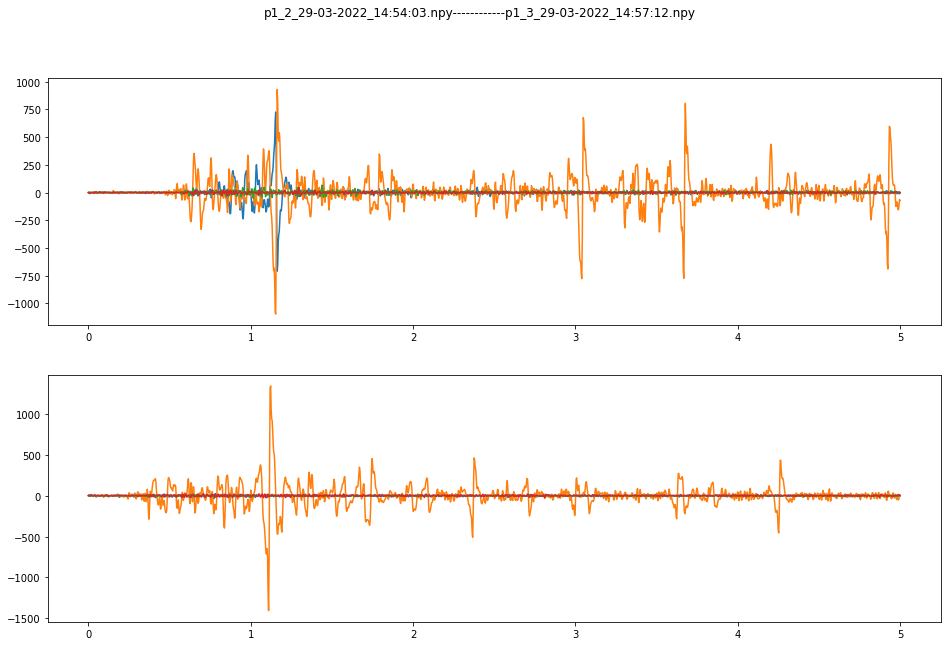

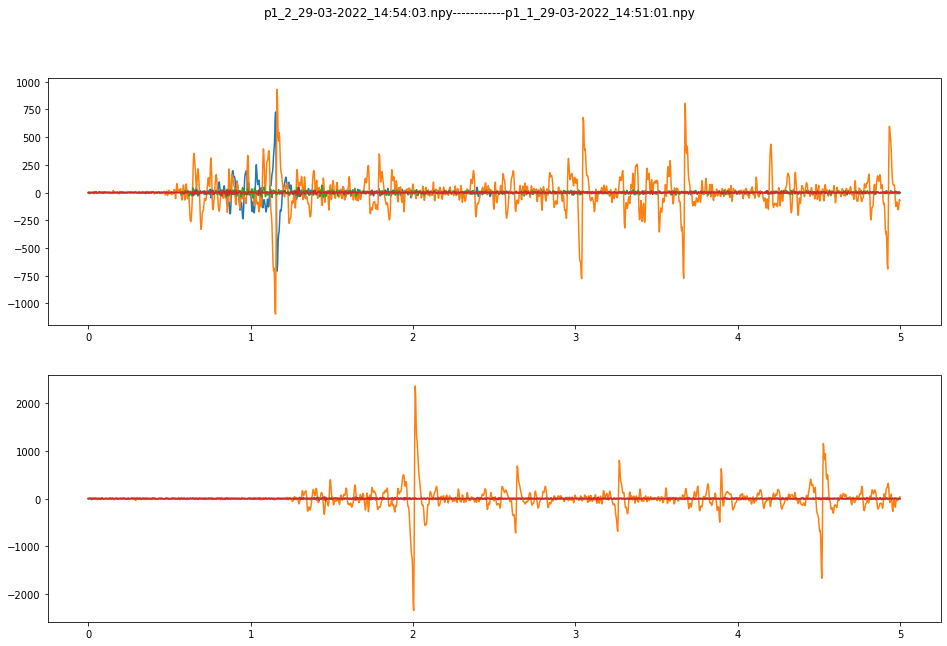

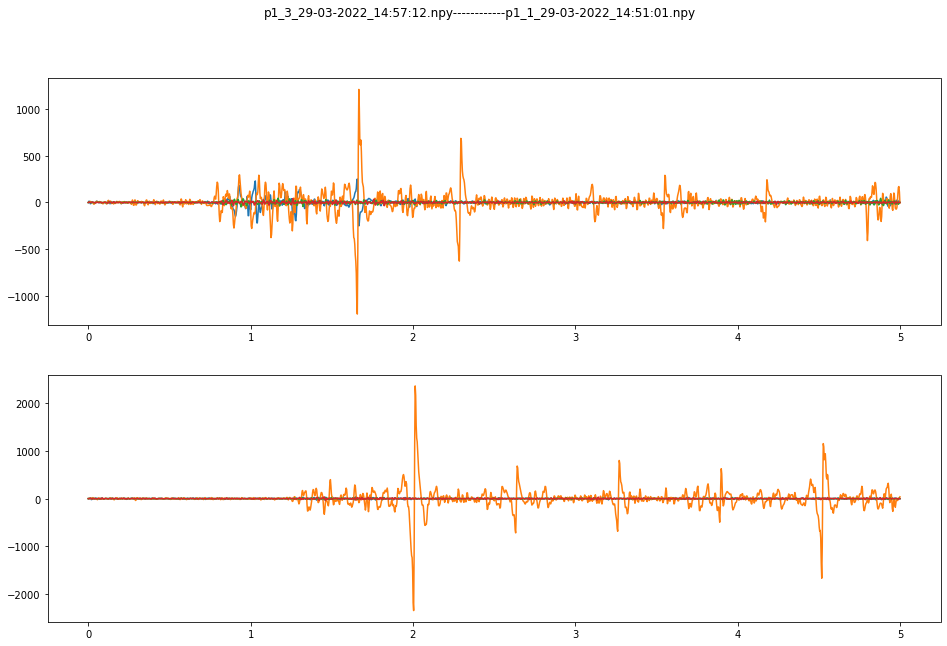

In [32]:
from itertools import combinations

comb = combinations(dirs, 2)

# imprime todas as combinações
for i in list(comb):
    coerencia(i[0],i[1])

# Distinção


In [49]:
def distinção(dt):

    %matplotlib inline
    import matplotlib.pyplot as plt
    from matplotlib import rcParams, cm
    
    data = np.load("datasets/topicos_cc/"+dt)
    data = np.transpose(data, (0, 2, 1))
    data_filtered = butter_notch(data, 60)
    data_filtered = butter_highpass(data_filtered, 5)
    data_filtered = butter_lowpass(data_filtered, 50) 
    
    
    # [classe 1, ensaio 1, canal 1], [classe 1, ensaio 1, canal 2]
    d1 = data[0,0,:], data[0,1,:],data[0,2,:], data[0,3,:]
    # [classe 1, ensaio 2, canal 1], [classe 1, ensaio 2, canal 2]
    d2 = data[1,0,:], data[1,1,:],data[1,2,:], data[1,3,:]

    rcParams['figure.figsize'] = [16., 10.]

    x = np.linspace(0, 5, 1600)
    fig, ax = plt.subplots(2, 1)

    ax[0].plot(x, d1[0])
    ax[0].plot(x, d1[1])
    ax[0].plot(x, d1[2])
    ax[0].plot(x, d1[3])

    ax[1].plot(x, d2[0])
    ax[1].plot(x, d2[1])
    ax[1].plot(x, d2[2])
    ax[1].plot(x, d2[3])


    plt.suptitle(dt + "------------")
    plt.show()

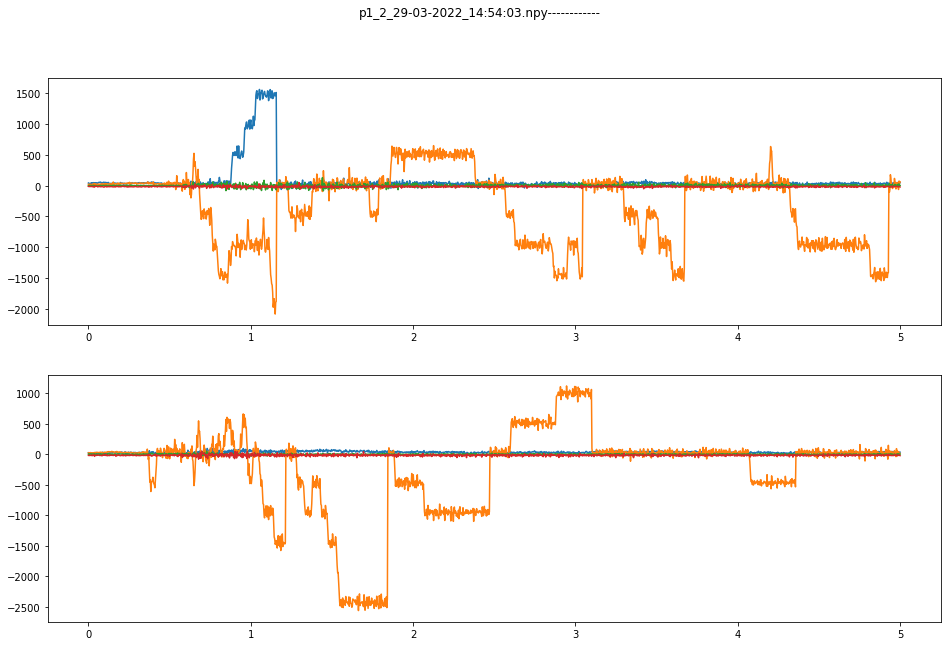

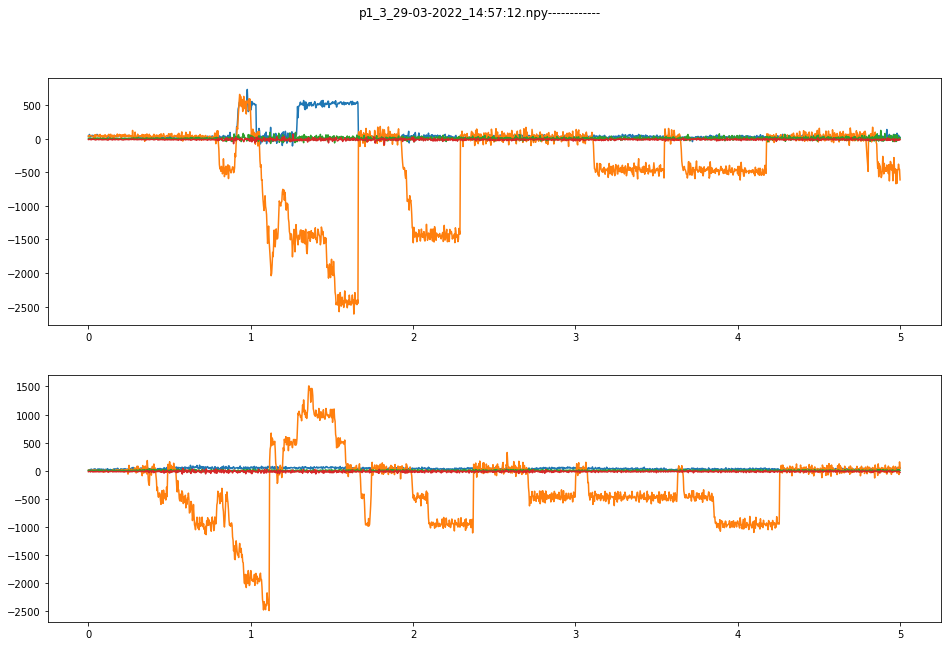

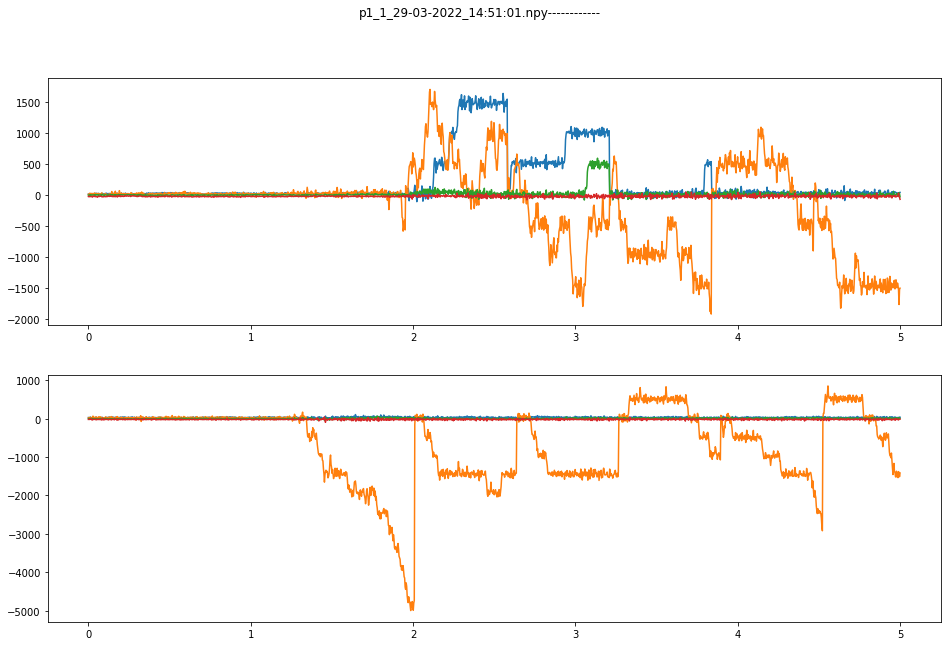

In [50]:
for i in dirs:

    distinção(i)